In [42]:
import os 
import random
from ultralytics import YOLO
from PIL import Image
import numpy as np
from rembg import remove
from inference.InferenceModel import InferenceModel
import matplotlib.pyplot as plt


##### Directory

In [43]:
TRAINED_MODEL_DIR = './trained_models'

YOLO_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'YOLO')
YOLO_BEST_MODEL = os.path.join('model_train_renfred_1', 'weights', 'best.pt')
YOLO_MODEL_PATH = os.path.join(YOLO_MODEL_DIR, YOLO_BEST_MODEL)

OCR_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'OCR')
OCR_BEST_MODEL = os.path.join('OCR_Agusv5', 'model', 'OCR_Agusv5.keras')
OCR_BEST_WEIGHTS = os.path.join(OCR_MODEL_DIR, 'OCR_Agusv5', 'weight', 'best_weight.keras')
OCR_MODEL_PATH = os.path.join(OCR_MODEL_DIR, OCR_BEST_MODEL)

SAMPLE_IMAGE_PATH = os.path.join('./sample_image')

#### Yolo Model Test

In [50]:
yolo_model = YOLO(YOLO_MODEL_PATH)

print(os.listdir(SAMPLE_IMAGE_PATH))
image_files = [file for file in os.listdir(SAMPLE_IMAGE_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
test_image_path = os.path.join(SAMPLE_IMAGE_PATH, random_image)
pil_image = Image.open(test_image_path)
# bg_removed_img = remove(pil_image)
numpy_image = np.array(pil_image)

yolo_result = yolo_model(test_image_path, conf=0.3)[0]


['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.png', '7.png', '8.jpg', '9.jpg']

image 1/1 c:\Users\NAN0C\Documents\Kuliah\Bangkit\Receipt_model\Inference_Model\sample_image\7.png: 640x512 2 date_times, 4 items, 1 receipt, 1 shop, 1 total, 897.7ms
Speed: 2.1ms preprocess, 897.7ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 512)


#### Removed Backgound


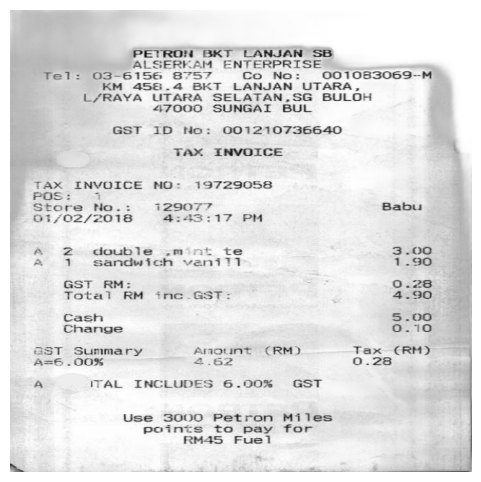

In [45]:
bg_removed = remove(pil_image)
plt.figure(figsize=(6, 6))
plt.imshow(bg_removed)
plt.axis('off')  # Hide the axes
plt.show()

In [54]:
yolo_result.show()

In [52]:
inference_model = InferenceModel(YOLO_MODEL_PATH, OCR_BEST_WEIGHTS, 0.3)
result = inference_model.predict(test_image_path)


0: 640x512 2 date_times, 4 items, 1 receipt, 1 shop, 1 total, 989.4ms
Speed: 2.0ms preprocess, 989.4ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 512)
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━

#### Final result

In [53]:
print(result)

{
    "item": [
        "1 UREAN BRUIILE  NC5",
        "F BREAN BTTE PDUDING  1180",
        "F 0HECD CROISANT 0/66",
        "F BARK OR UHUDLAT 45[UNK]"
    ],
    "shop": "BREAUTALK",
    "total": "",
    "date_time": ""
}


Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


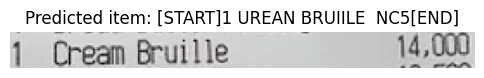

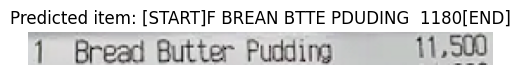

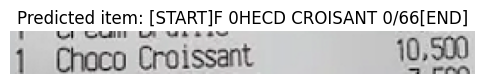

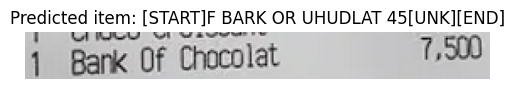

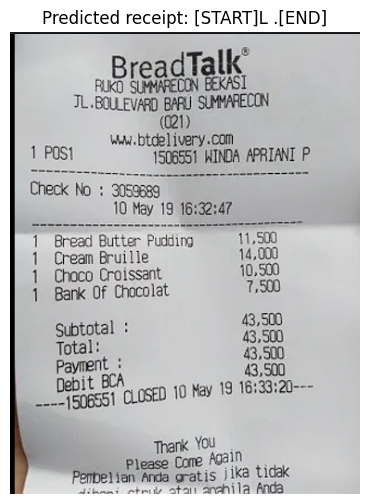

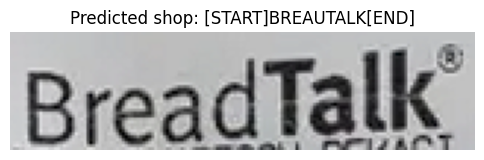

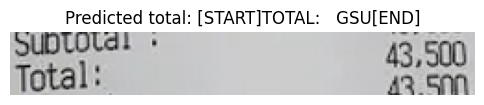

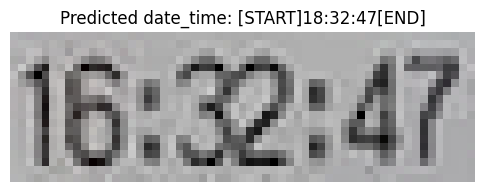

In [55]:
inference_model.visualize_results()